# Linear regression with statsmodels
## Objective
You will learn the followin:
1. How to import sample data.
2. How to view the data description.
3. How to create histograms and scatter plots.
4. How to split the data into training and test sets.
5. How to build a linear model using Statsmodels.
6. How to make predictions on the test data using the built model.

## Instructions
- This notebook contains only the expected results.
- Your task is to write the source code that generates similar (or nearly identical) results.
- Please insert your source code into the designated code cells.
- Submit your updated notebook file.

## Note on Randomess
The process of dividing the dataset into training and testing sets involves randomness due to the **train_test_split** function. Consequently, the regression results and the scatter plot results in the final step may differ between executions.

In [2]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)
desc_df = df['DESCR']
print(desc_df)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

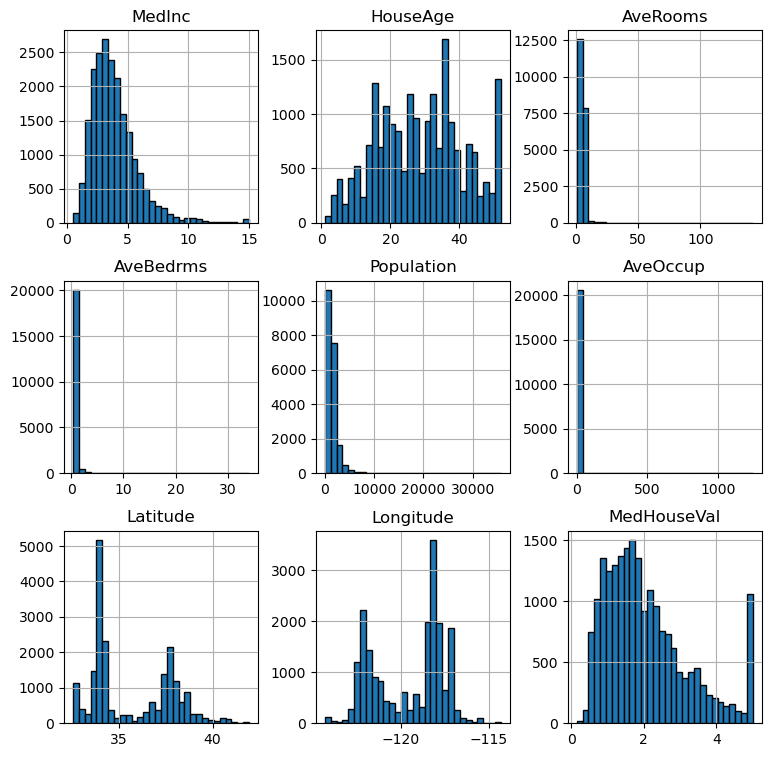

In [2]:
import matplotlib.pyplot as plt
df.frame.hist(figsize=(9,9), bins=30, edgecolor = 'black')
plt.show()

In [3]:
df.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
from sklearn.model_selection import train_test_split
X = df.frame.iloc[:,:-1]
y = df.frame.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print('X train:', X_train.shape)
print('X test:', X_test.shape)
print('y train:', y_train.shape)
print('y test:', y_test.shape)

X train: (16512, 8)
X test: (4128, 8)
y train: (16512,)
y test: (4128,)


In [5]:
import statsmodels.api as sm
st_model = sm.OLS(y, X)
res = st_model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                        0.00
Time:                        13:15:21   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

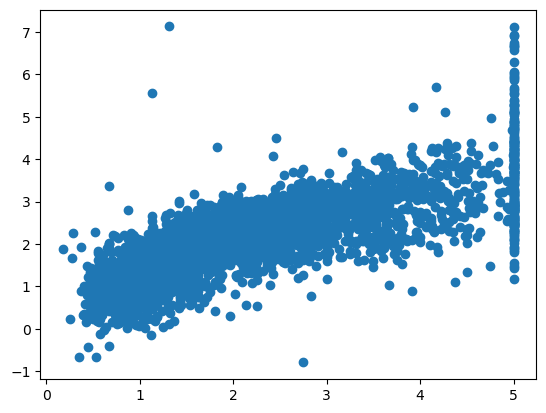

In [6]:
# Get y_pred using the training model and X_test. 
# Draw a scatter plot between y_test (x-axis) and y_pred (y-axis)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

plt.scatter(y_test, pred)
plt.show()